# MCS 275 Spring 2024 Homework 14 Solutions

* Course Instructor: Emily Dumas


## 2. International Space Station hemisphere

The International Space Station (ISS) is a crewed scientific research station in orbit around the earth.  At any given time, it is about 220 miles above some location on the earth's surface.

Write a Python script that prints a single sentence to the terminal, either
```
The International Space Station (ISS) is over the NORTHERN hemisphere right now.
```
or
```
The International Space Station (ISS) is over the SOUTHERN hemisphere right now.
```
according to the current location of the ISS.  Retrieve the location using the JSON object available from `https://api.wheretheiss.at/v1/satellites/25544` which is part of the API documented [here](https://wheretheiss.at/w/developer).

(The grading of the assignment will not take into account the behavior of your program when the ISS is directly over the equator.)

### Solution

In [2]:
from urllib.request import urlopen
import json

with urlopen("https://api.wheretheiss.at/v1/satellites/25544") as resp:
    data = json.load(resp)

if data["latitude"] > 0:
    print("The International Space Station (ISS) is over the NORTHERN hemisphere right now.")
elif data["latitude"] < 0:
    print("The International Space Station (ISS) is over the SOUTHERN hemisphere right now.")
else:
    print("The International Space Station (ISS) is over the EQUATOR right now.")

The International Space Station (ISS) is over the NORTHERN hemisphere right now.


## 3. HTML to image

First, a quick note about HTML:  In an HTML document, you can make a section of text (or even a single character) appear in a specific color as follows:
```html
<span style="color: #8800aa;">Deep purple</span>
```
which gives a result that looks like this:

<span style="color: #8800aa;">Deep purple</span>

When this technique is used, it means the color of the text is found somewhere in the value of the `style` attribute of a `span` tag that contains the text.


Now, here's a web page that contains a picture of a cow:

* [https://www.dumas.io/teaching/2024/spring/mcs275/data/moo.html](https://www.dumas.io/teaching/2024/spring/mcs275/data/moo.html)

But if you look at the source of the page, you'll see the page doesn't really contain an image at all.  Instead, it has many paragraphs full of unicode block characters (which look like &block; and are created with `&block;`).  Each block character is given a different color, so the resulting grid of blocks looks a bit like an image.

Write a Python script that downloads this HTML document linked above (the one the cow "image") and then uses `bs4` (beautiful soup) to parse the HTML and traverses the DOM to extract the color data.  It should then write a PNG image called `moo.png` in which each pixel corresponds to one of the block characters in the web page (and has the same color).  Use pillow (`PIL.Image`) to create the image file.

When you're done, `moo.png` should look like a very small image of a cow.  Also, it will be a bit vertically squashed, because pixels are usually square while unicode characters are usually about twice as tall as they are wide.  If you've done everything correctly, the final image should have a width of 130 pixels and a height of 43 pixels.

For your convenience, here is a function that takes a string like `#8800aa` and returns a tuple of integers like `(136, 0, 170)`.

In [1]:
def hex_color_to_triple(s):
    "Convert a 6-hex-digit color specification to 3 integers"
    s = s.strip("# ")
    if len(s)!=6:
        raise ValueError("Malformed color specification")
    r = int(s[:2],16)
    g = int(s[2:4],16)
    b = int(s[4:],16)
    return (r,g,b)

### Solution

The cell below performs the requested conversion, assuming the color conversion function given above is available in the global scope.

In [2]:
from urllib.request import urlopen
import json
import time
import PIL.Image
from bs4 import BeautifulSoup

time.sleep(1) # courtesy pause
with urlopen("https://www.dumas.io/teaching/2024/spring/mcs275/data/moo.html") as resp:
    soup = BeautifulSoup(resp,"html.parser")

height = len(soup.find_all("p"))
width = len(soup.p.find_all("span"))

img = PIL.Image.new("RGB",(width,height))
for y,p_tag in enumerate(soup.find_all("p")):
    for x,span_tag in enumerate(p_tag.find_all("span")):
        img.putpixel((x,y), hex_color_to_triple(span_tag["style"].removeprefix("color:").removesuffix(";")))

img.save("moo.png")

Here's what it looks like.

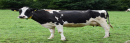

In [3]:
import PIL.Image
PIL.Image.open("moo.png")

And if we increase the size, while also scaling by an extra factor of 2 in the y direction, it looks much more like the web page:

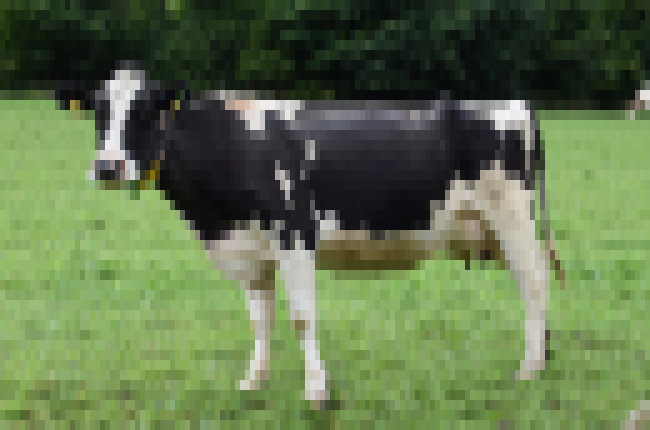

In [7]:
import PIL.Image
scalefactor = 5
img = PIL.Image.open("moo.png")
img.resize((scalefactor*img.size[0],2*scalefactor*img.size[1]),PIL.Image.Resampling.NEAREST)

### Revision history

* 2024-05-14 Initial publication (Eek! After the semester ended!)